# Empirical Part
# Running ols model


In [20]:
import numpy as np
 
import pandas as pd
 
import matplotlib.pyplot as plt
 
import statsmodels.api as sm

In [21]:
data = pd.read_excel('Data HW-2.xls', index_col=0)  

In [22]:
data

,Unemployment,Violence
State,,
Alabama,7.2,383.7
Alaska,7.0,635.3
Arizona,7.7,413.6
Arkansas,7.2,503.5
California,8.9,439.6
Colorado,6.9,323.7
Connecticut,7.8,282.0
Delaware,6.7,623.3
District of Columbia,8.5,1326.8


### Draw a histogram of the Violence data Frequency distribution

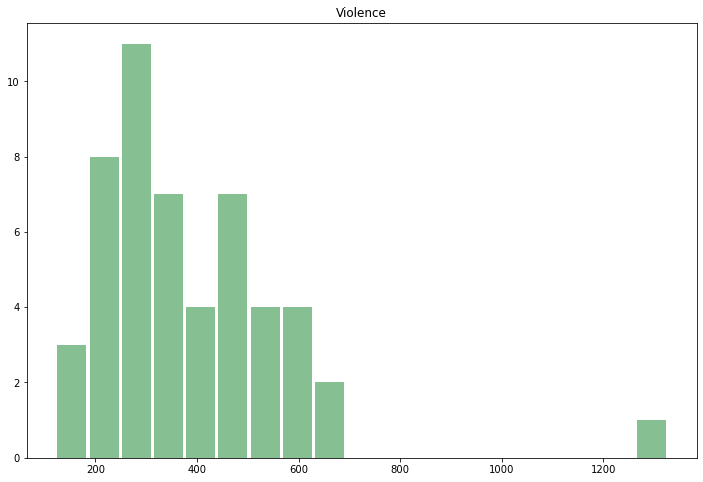

In [23]:
vio_hist = data.hist(column='Violence', bins=19, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)




#### Draw a similar histogram (with 19 bins) of the Unemployment data, and report


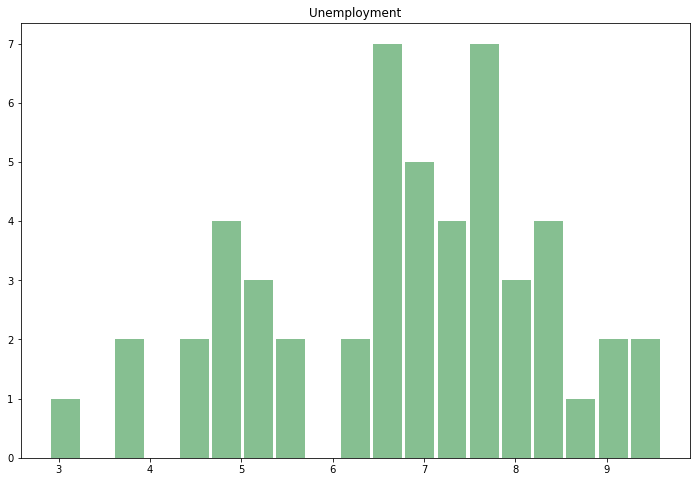

In [24]:
une_hist=data.hist(column='Unemployment', bins=19, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)


### 3. Can you find out which State has the highest rate of violent crime reported

In [25]:
# Returns index of maximum violence
data[['Violence']].idxmax() 


Violence    District of Columbia
dtype: object

### 4. Provide a statistical summary of a given variable.

In [26]:
data.describe()

,Unemployment,Violence
count,51.000000,51.000000
mean,6.764706,385.280392
std,1.539328,195.113742
min,2.900000,122.100000
25%,5.550000,260.850000
50%,6.900000,323.700000
75%,7.800000,475.150000
max,9.600000,1326.800000


### 5. Check whether it we can visibly see if there is any relationship between unemployment and violent crime rates by drawing a scatterplot? What does interpretation tell?

# Here,
# Unemployment = Independent Variable
# Violence = Dependent Variable


In [29]:

#We will create a linear regression which predicts the Violence based on Unemployment rate in the States
y = data['Violence']
 
x1 = data['Unemployment']

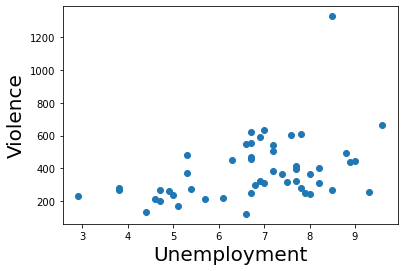

,Unemployment,Violence
Unemployment,1.000000,0.420882
Violence,0.420882,1.000000


In [34]:
plt.scatter(x1,y)
 
plt.xlabel('Unemployment', fontsize = 20)
 
plt.ylabel('Violence', fontsize = 20)
 
plt.show()
data.corr(method ='pearson') 

#Here we see positive but not so strong correlation between two variables r=.42



### 6. Since we’ve inspected our variables sufficiently, it is now time to run our first regression. Let’s run an ordinary least squares regression with ’Violence’ as a dependent variable, and ’Unemployment’ (and a constant) as an independent variable.

In [31]:
x = sm.add_constant(x1)
 
results = sm.OLS(y,x).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Violence   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     10.55
Date:                Fri, 19 Feb 2021   Prob (F-statistic):            0.00210
Time:                        20:59:22   Log-Likelihood:                -335.84
No. Observations:                  51   AIC:                             675.7
Df Residuals:                      49   BIC:                             679.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.3979    113.900      0.214      0.831    -204.492     253.288
Unemployment    53.3478     16.426      3.248      0.002      20.339      86.356
==============================================================================
Omnibus:                       43.512   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.095
Skew:                           2.169   Prob(JB):                     3.19e-42
Kurtosis:                      11.433   Cond. No.                         32.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7. What is the coefficient on ’Unemployment’? What is the interpretation of this value?

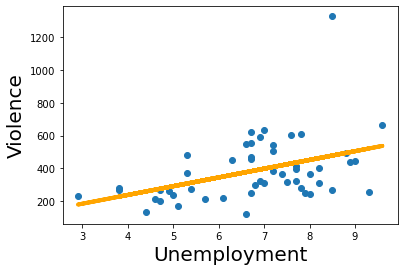

In [32]:
plt.scatter(x1,y)
 
yhat = 53.3478*x1 + 24.3979
 
fig = plt.plot(x1,yhat, lw=4, c='orange', label = 'regression line')
 
plt.xlabel('Unemployment', fontsize = 20)
 
plt.ylabel('Violence', fontsize = 20)
 
plt.show()
#The coefficient of Unemployment is 53.3478, it means that in increase by one unit in Unemployment 
#will lead to an increase by 53.34 in Violence

### 8. What would this model predict would be the increase in the rate of violent crime for a 1 standard deviation increase in unemployment? What is this increase in terms of standard deviations of the rate of violence?

#### To answer to this question I have to find standardized coefficient and this value will give us whar would be the increase in the rate of violence for a standard deviation increase in unemployment

In [33]:

#standardizing the coefficients
#standard_coef(x1) = unstandardized_coef(x1)*(standard_deviation(x1)/standard_dev(y)

s_x1=1.539328
s_y =195.113742
standard_b=53.3478*(s_x1/s_y)
print('Standardized coefficient is:' + str(standard_b))


Standardized coefficient is:0.42088148910803014


##### Here is the direct interpretation for one of these standardized coefficients: The value 0.4208 for audience says that an increase in unemployment of one of its standard deviations will result in an expected increase in violence of 0.4208 of its standard deviations

### 9. What does a regression of the rate of unemployment on violent crime rates (the other way round to that in the last part) suggest would be the increase in the unemployment rate for a 1 standard deviation increase in the rate of violent crime?

# Here,
# Violence = Independent Variable
# Unemployment = Dependent Variable

In [39]:
#We will create a linear regression which predicts the Unemploymnt based on Violence rate in the States
y = data['Unemployment']
 
x1 = data['Violence']

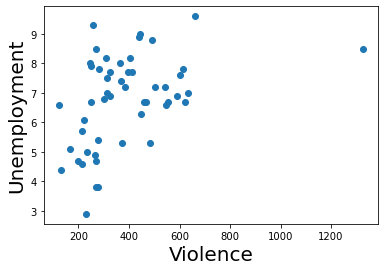

In [44]:
plt.scatter(x1,y)
 
plt.xlabel('Violence', fontsize = 20)
 
plt.ylabel('Unemployment', fontsize = 20)
 
plt.show()


In [45]:
x = sm.add_constant(x1)
 
results = sm.OLS(y,x).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     10.55
Date:                Fri, 19 Feb 2021   Prob (F-statistic):            0.00210
Time:                        21:13:23   Log-Likelihood:                -88.888
No. Observations:                  51   AIC:                             181.8
Df Residuals:                      49   BIC:                             185.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4854      0.441     12.449      0.000       4.600       6.371
Violence       0.0033      0.001      3.248      0.002       0.001       0.005
==============================================================================
Omnibus:                        0.760   Durbin-Watson:                   2.405
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.816
Skew:                          -0.140   Prob(JB):                        0.665
Kurtosis:                       2.447   Cond. No.                         962.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

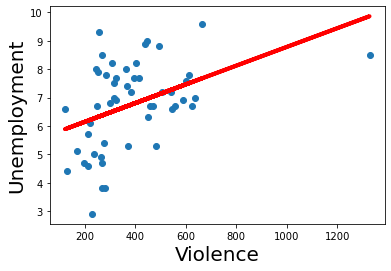

In [48]:
plt.scatter(x1,y)
 
yhat = 0.0033*x1 + 5.4854
 
fig = plt.plot(x1,yhat, lw=4, c='red', label = 'regression line')
 
plt.xlabel('Violence', fontsize = 20)
 
plt.ylabel('Unemployment', fontsize = 20)
 
plt.show()
#The coefficient of Violence is .0033, it means that in increase by one unit in Violence 
#will lead to an increase by .0033 in Unemployment

### 10. Can you use this regression to uncover what it suggests the increase in unemployment associated with a 1 standard deviation increase in violent crime? Is this the same as we found previously? Why is this the same/different?

In [51]:
#standardizing the coefficients
#standard_coef(x1) = unstandardized_coef(x1)*(standard_deviation(x1)/standard_dev(y)

s_x1=195.113742
s_y = 1.539328
standard_b=0.0033*(s_x1/s_y)
print('Standardized coefficient is:' + str(standard_b))

Standardized coefficient is:0.4182833993794695


#### Here is the direct interpretation for one of these standardized coefficients: The value 0.4182 for audience says that an increase in violence of one of its standard deviations will result in an expected increase in unemployment of 0.4182 of its standard deviations

#### So, the standardized coefficient are almost the same. But in the first regression unemployment had just a slightly more effect on violence

### 11. What can you conclude about the causal mechanism between violent crime and unemployment based on the two regressions you have run? Does violent crime cause unemployment or vice versa?

#### It is kind of misleading, but refferring to the numbers we have, I agree with the model that Unemployment causes Violent crime.

### 12. Why might it be incorrect to conclude that increases in unemployment lead to increases in rates of violent crime?

#### Because each of them showed significant effect on each other, I would recommend to take a larger sample and see the results